<a href="https://colab.research.google.com/github/ernesmf23/Econometria_st/blob/main/AUTOCORRELOGRAMAS_SERIES_TIEMPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODELOS ESTACIONARIOS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

warnings.filterwarnings('ignore')  # Para evitar warnings molestos

In [ ]:
def simulate_and_plot(ar_coeffs, ma_coeffs, d=0, n=300, title="Modelo"):
    """
    Simula y grafica FAC y FACP para un modelo ARIMA(p,d,q)
    """
    # Agrega 1 al principio (porque el modelo define polinomios en -L)
    ar = np.r_[1, -np.array(ar_coeffs)]  # AR(p)
    ma = np.r_[1, np.array(ma_coeffs)]   # MA(q)

    arma_process = ArmaProcess(ar, ma)
    np.random.seed(42)  # Para reproducibilidad
    serie = arma_process.generate_sample(nsample=n)

    # Si hay integración (I(d)), aplicar sumas acumuladas
    for _ in range(d):
        serie = np.cumsum(serie)

    # GRAFICAR
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))

    ax[0].plot(serie)
    ax[0].set_title(f"{title} - Serie simulada")

    plot_acf(serie, ax=ax[1], lags=30)
    ax[1].set_title("FAC")

    plot_pacf(serie, ax=ax[2], lags=30, method='ywm')
    ax[2].set_title("FACP")

    plt.tight_layout()
    plt.show()

##Modelo AR(1)


En un modelo AR(1) (autoregresivo de orden 1), el coeficiente puede tomar cualquier valor real, pero solo será estacionario si se encuentra dentro de un rango específico.

$$y_{t} = \phi_{1} y_{t-1} + \varepsilon_{t}$$

Donde:

*   $\phi_{1}$ : coeficiente de autorregresión.
*   $\varepsilon_{t} \sim$ ruido blanco





**Condición de estacionariedad (según Hamilton, Enders, Lütkepohl):**

El proceso AR(1) es estacionario en sentido débil si y solo si:

$$|\phi_{1}| < 1$$


Interpretación de valores

| Valor de $\phi_1$         | Comportamiento de la serie          | Estacionariedad |
| ------------------------- | ----------------------------------- | --------------- |
| $\phi_1 = 0$              | Ruido blanco                        | ✅ Sí            |
| $0 < \phi_1 < 1$   | Serie persistente pero decae        | ✅ Sí            |
| $\phi_1 = 1$      | Paseo aleatorio (random walk)       | ❌ No            |
| $\phi_1 > 1$      | Explosiva, crece sin límite         | ❌ No            |
| $-1 < \phi_1 < 0$ | Estacionaria con inversión de signo | ✅ Sí            |
| $\phi_1 = -1$     | Oscilaciones extremas               | ❌ No            |
| $\phi_1 < -1$     | Explosiva con oscilaciones          | ❌ No            |


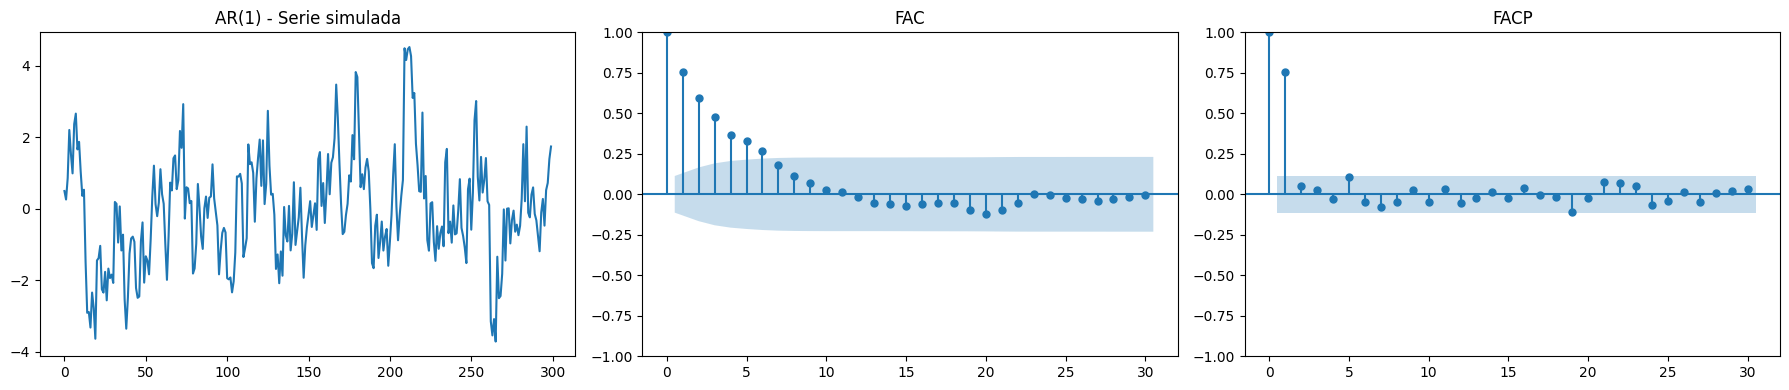

In [ ]:
# AR(1)
simulate_and_plot(ar_coeffs=[0.8], ma_coeffs=[], title="AR(1)")


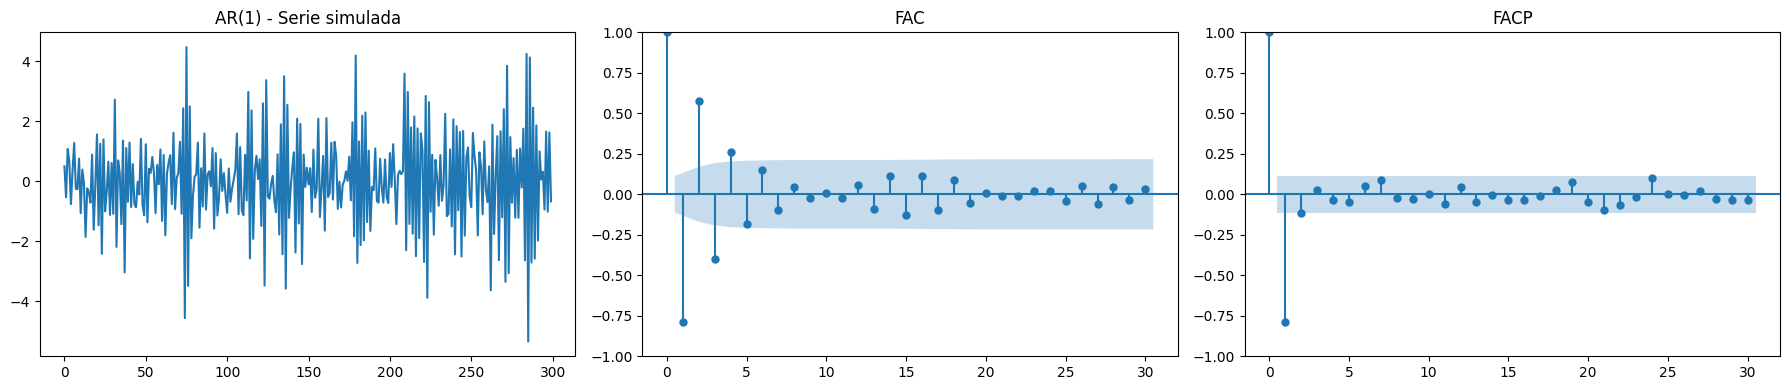

In [ ]:
# AR(1)
simulate_and_plot(ar_coeffs=[-0.8], ma_coeffs=[], title="AR(1)")

##Modelo AR(2)

Un modelo AR(2) tiene la forma:
$$y_{t} = \phi_{1} y_{t-1} + \phi_{2} y_{t-2} + \varepsilon_{t}$$

Donde:

*   $\phi_{1}$, $\phi_{2}$ : coeficientes del modelo.
*   $\varepsilon_{t}$ : ruido blanco.



---

**Condición de estacionariedad en AR(2):**

Según Hamilton (1994) y Lütkepohl (2005), la serie es estacionaria si las raíces del polinomio característico están fuera del círculo unitario, es decir:
$$1 - \phi_1 z - \phi_2 z^2 = 0 \quad \text{tiene raíces } |z| > 1$$

Esto implica que los coeficientes deben cumplir las siguientes condiciones:



1.   $|\phi_2| < 1$
2.   $\phi_1 + \phi_2 < 1$
3.   $\phi_2 - \phi_1 < 1$

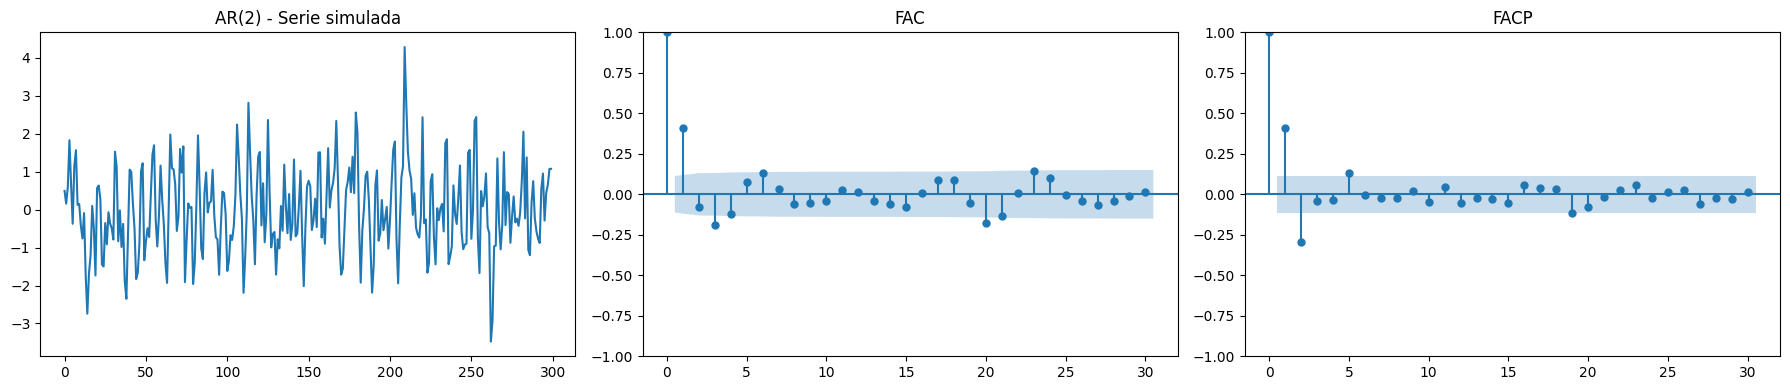

In [ ]:
# AR(2)
simulate_and_plot(ar_coeffs=[0.6, -0.3], ma_coeffs=[], title="AR(2)")

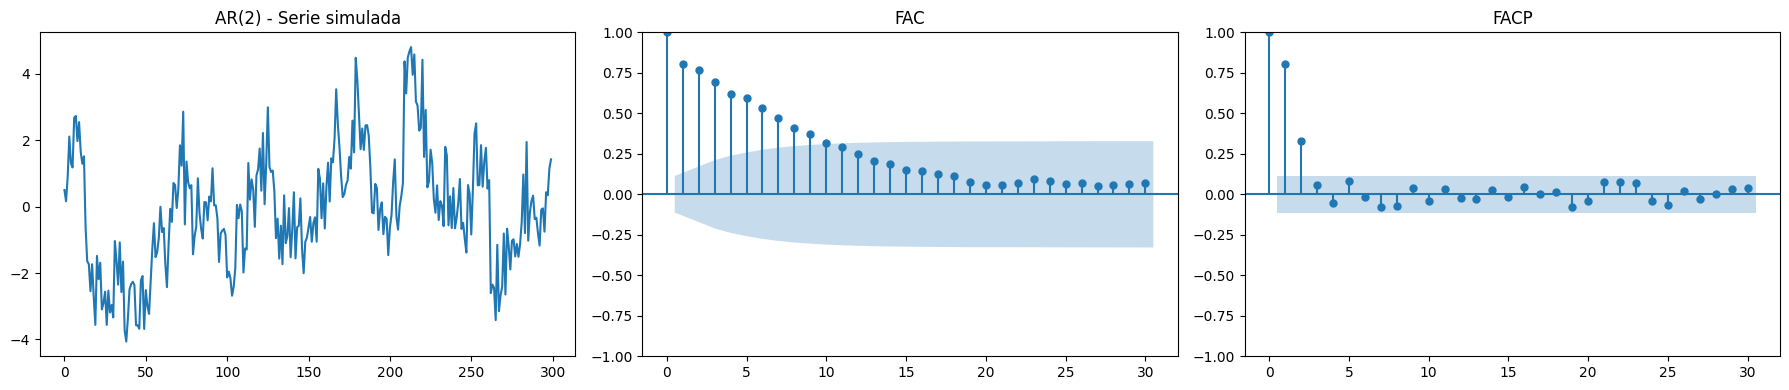

In [ ]:
# AR(2)
simulate_and_plot(ar_coeffs=[0.6, 0.3], ma_coeffs=[], title="AR(2)")

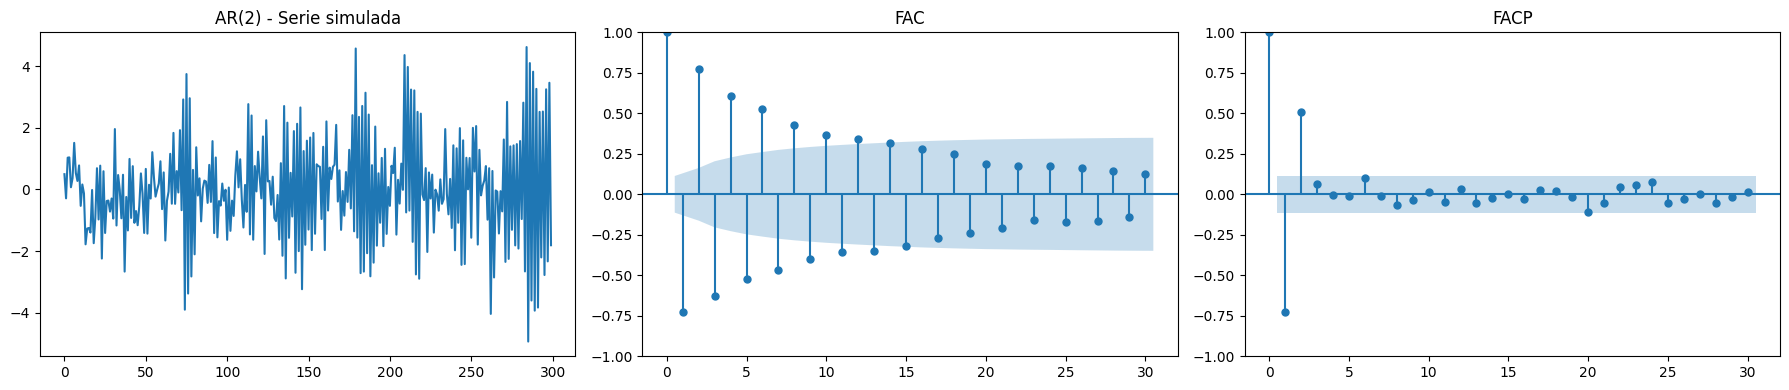

In [ ]:
# AR(2)
simulate_and_plot(ar_coeffs=[-0.3, 0.6], ma_coeffs=[], title="AR(2)")

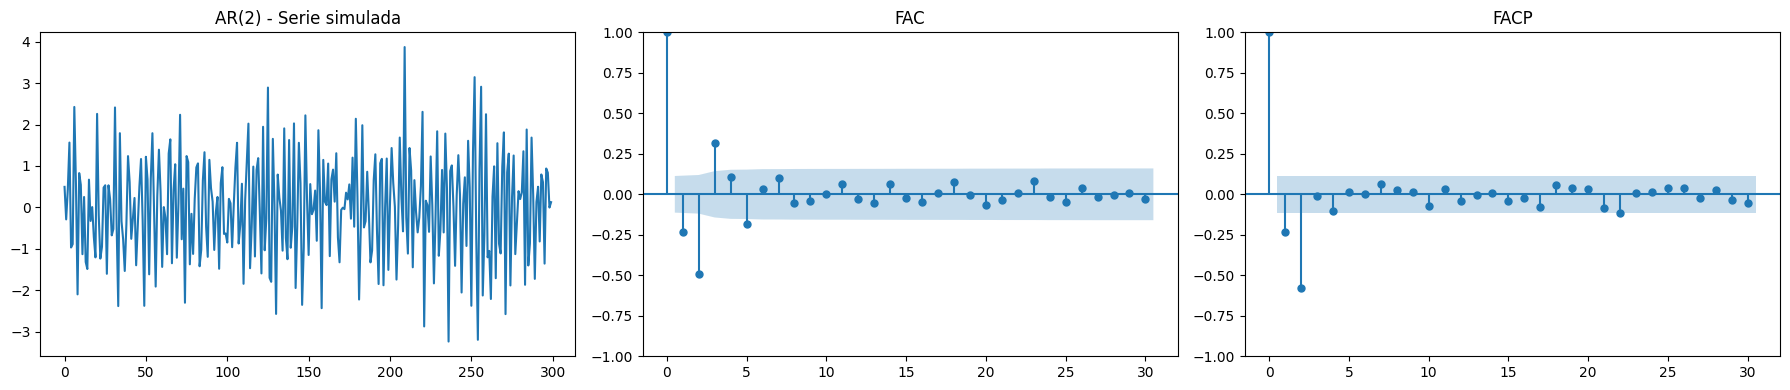

In [ ]:
# AR(2)
simulate_and_plot(ar_coeffs=[-0.3, -0.6], ma_coeffs=[], title="AR(2)")

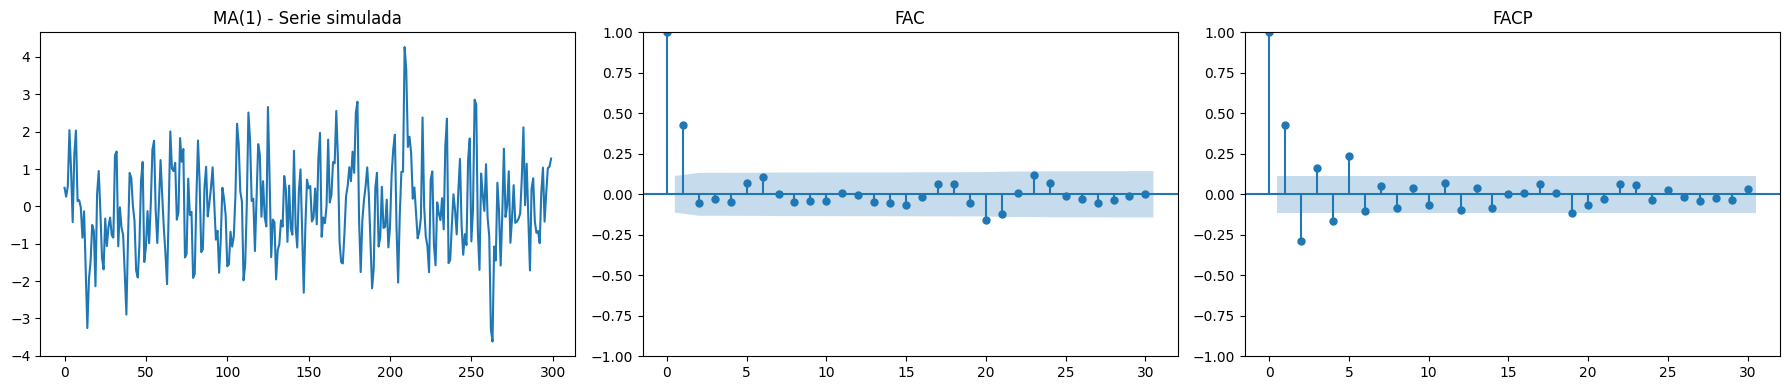

In [ ]:
# MA(1)
simulate_and_plot(ar_coeffs=[], ma_coeffs=[0.8], title="MA(1)")

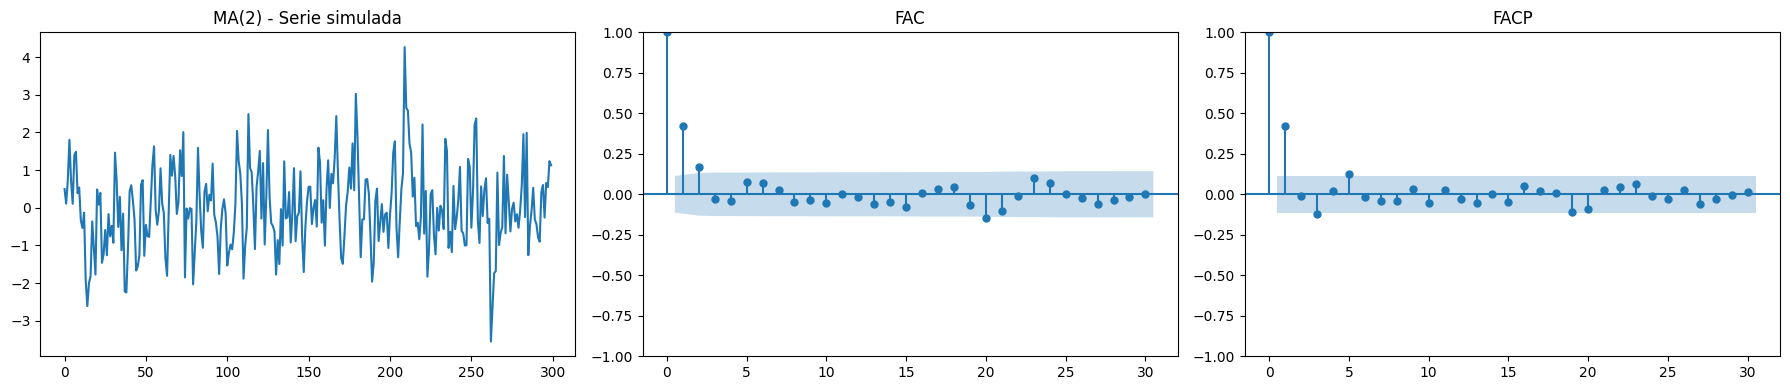

In [ ]:
# MA(2)
simulate_and_plot(ar_coeffs=[], ma_coeffs=[0.5, 0.3], title="MA(2)")

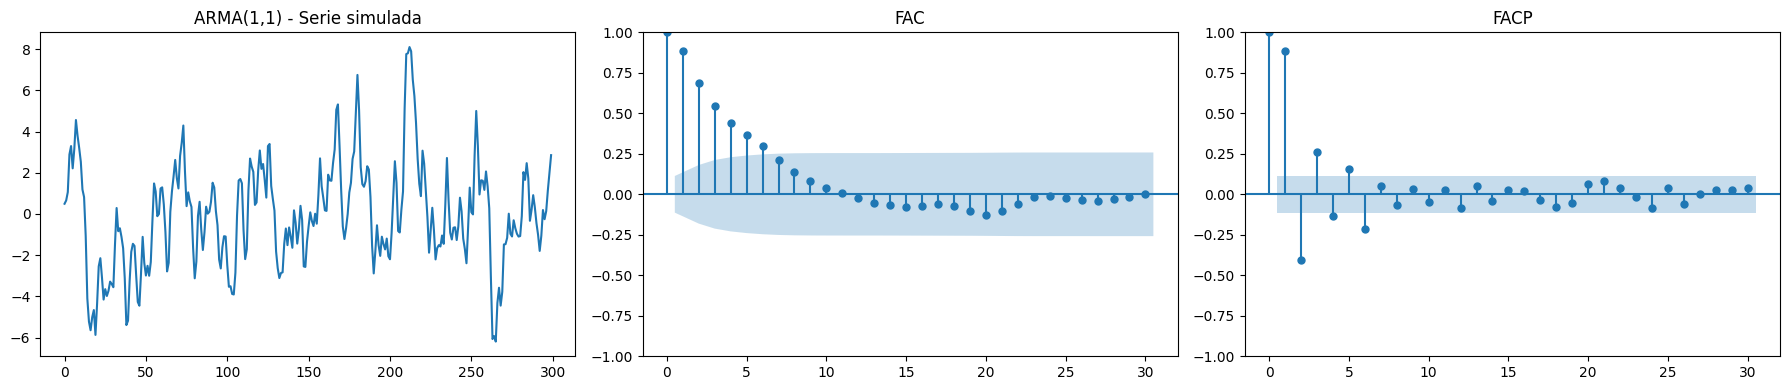

In [ ]:
# ARMA(1,1)
simulate_and_plot(ar_coeffs=[0.8], ma_coeffs=[0.8], title="ARMA(1,1)")

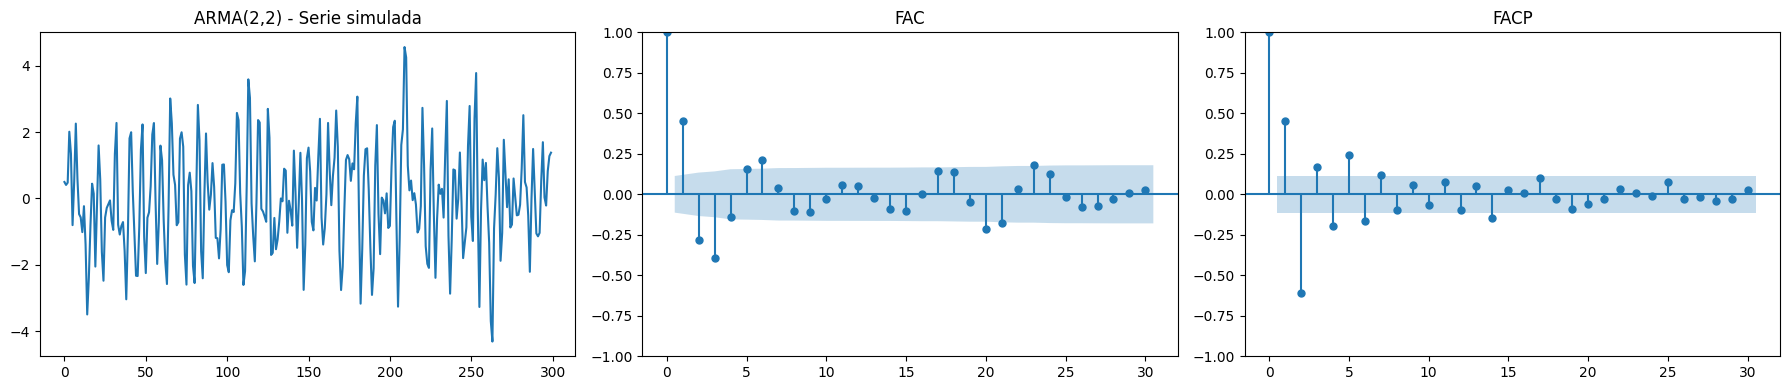

In [ ]:
# ARMA(2,2)
simulate_and_plot(ar_coeffs=[0.6, -0.4], ma_coeffs=[0.5, -0.3], title="ARMA(2,2)")

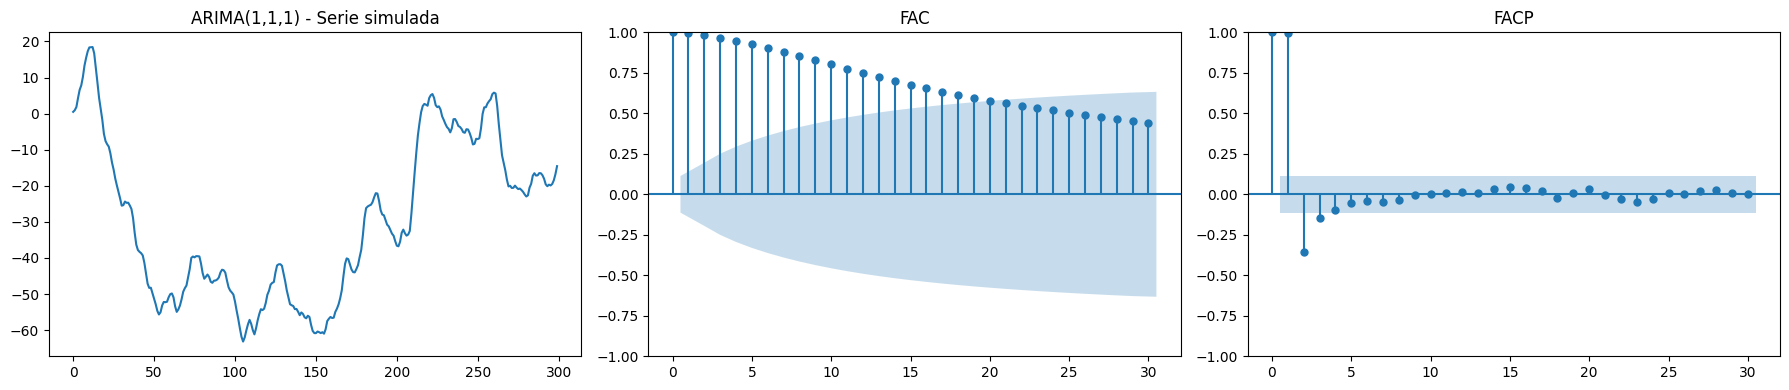

In [ ]:
# ARIMA(1,1,1)
simulate_and_plot(ar_coeffs=[0.7], ma_coeffs=[0.5], d=1, title="ARIMA(1,1,1)")

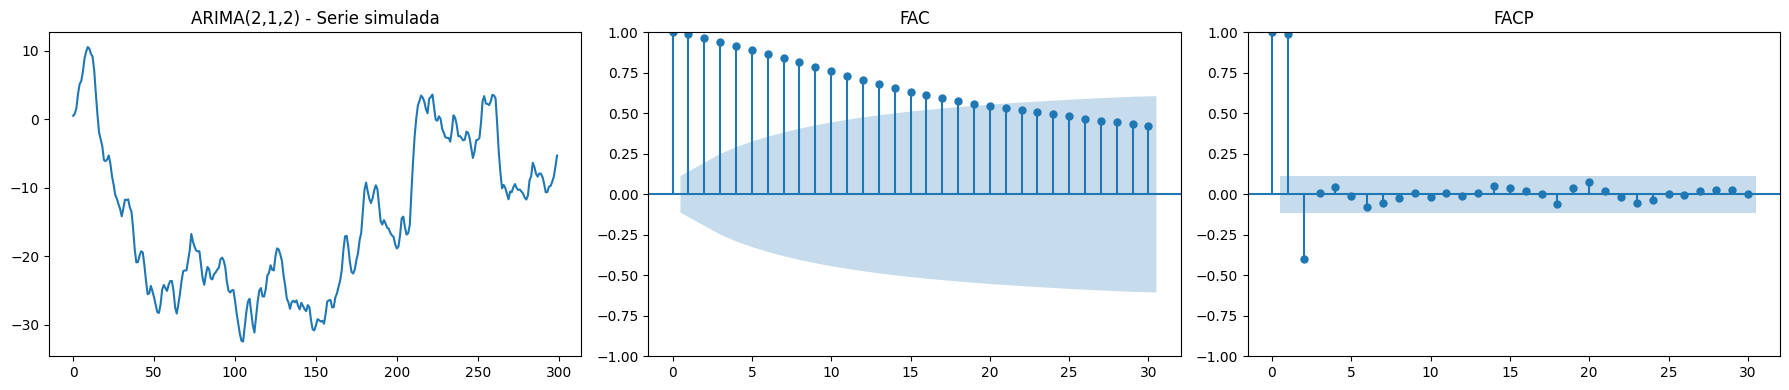

In [ ]:
# ARIMA(2,1,2)
simulate_and_plot(ar_coeffs=[0.5, -0.2], ma_coeffs=[0.4, 0.3], d=1, title="ARIMA(2,1,2)")